In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\aspyn\mouse_metadata.csv"
study_results_path = r"C:\Users\aspyn\study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge our two data frames together
combined_mouse_metadata_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mouse_metadata_study_results.head()

# Display the first few rows of the combined data frame
combined_mouse_metadata_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Step 1: Determine the number of unique mouse IDs
unique_mice_count = combined_mouse_metadata_study_results['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_count)

# Check for duplicates based on both 'Mouse ID' and 'Timepoint'
duplicate_timepoints = combined_mouse_metadata_study_results.duplicated(subset=['Mouse ID', 'Timepoint'])

# Print the rows with duplicate time points
print(combined_mouse_metadata_study_results[duplicate_timepoints])

Number of unique mice IDs: 249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Create a new DataFrame excluding data for mouse ID 'g989'
filtered_data = combined_mouse_metadata_study_results[combined_mouse_metadata_study_results['Mouse ID'] != 'g989']

# Display the first few rows of the filtered DataFrame
print(filtered_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [5]:
# Count the number of unique mouse IDs in the filtered DataFrame
unique_mice_count = filtered_data['Mouse ID'].nunique()

# Display the updated number of unique mice IDs
print("Updated number of unique mouse IDs:", unique_mice_count)

Updated number of unique mouse IDs: 248


In [6]:
# Group the merged DataFrame by 'Drug Regimen' and calculate summary statistics
drug_regimen_data = combined_mouse_metadata_study_results.groupby('Drug Regimen').agg(
    Count=('Mouse ID', 'nunique'),  # Count unique mice for each regimen
    Mean_Age=('Age_months', 'mean'),  # Mean age for each regimen
    Mean_Weight=('Weight (g)', 'mean'),  # Mean weight for each regimen
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),  # Mean tumor volume for each regimen
    Variance_Tumor_Volume=('Tumor Volume (mm3)', 'var'),  # Variance of tumor volume for each regimen
    Std_Dev_Tumor_Volume=('Tumor Volume (mm3)', 'std'),  # Standard deviation of tumor volume for each regimen
    SEM_Tumor_Volume=('Tumor Volume (mm3)', 'sem')  # Standard error of the mean for tumor volume for each regimen
).reset_index()

# Display the DataFrame with a row for each drug regimen
print(drug_regimen_data)

  Drug Regimen  Count   Mean_Age  Mean_Weight  Mean_Tumor_Volume  \
0    Capomulin     25  13.456522    19.965217          40.675741   
1     Ceftamin     25  13.247191    27.398876          52.591172   
2    Infubinol     25  16.230337    27.196629          52.884795   
3     Ketapril     25  15.659574    27.861702          55.235638   
4     Naftisol     25  12.000000    27.166667          54.331565   
5      Placebo     25  10.734807    27.928177          54.033581   
6     Propriva     25  10.894410    27.043478          52.322552   
7     Ramicane     25  10.684211    19.679825          40.216745   
8     Stelasyn     24  12.784530    27.856354          54.233149   
9    Zoniferol     25  12.598901    27.692308          53.236507   

   Variance_Tumor_Volume  Std_Dev_Tumor_Volume  SEM_Tumor_Volume  
0              24.947764              4.994774          0.329346  
1              39.290177              6.268188          0.469821  
2              43.128684              6.567243    

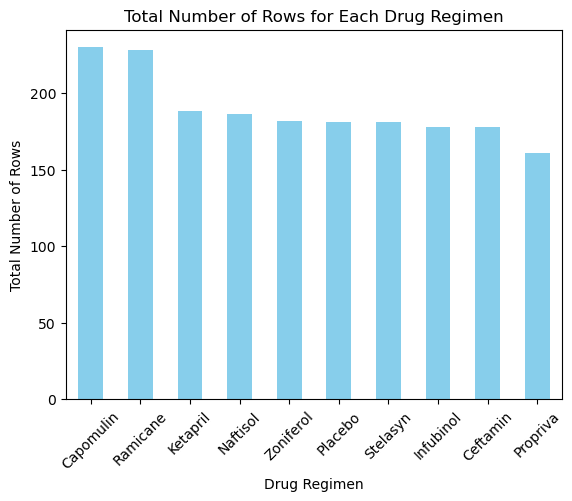

In [7]:
# Count the occurrences of each drug regimen
regimen_counts = combined_mouse_metadata_study_results['Drug Regimen'].value_counts()

# Plotting a bar chart
regimen_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

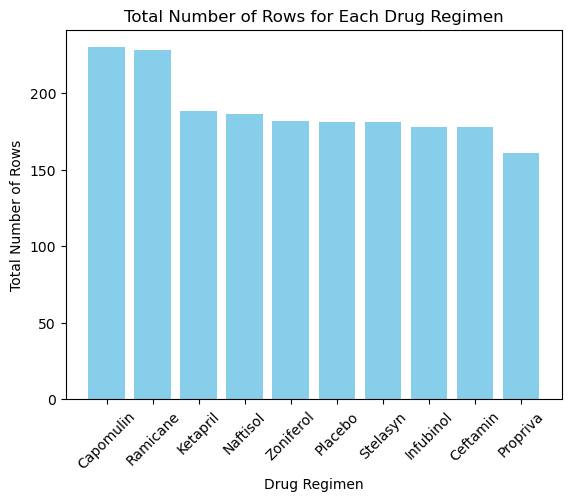

In [8]:
# Count the occurrences of each drug regimen
regimen_counts = combined_mouse_metadata_study_results['Drug Regimen'].value_counts()

# Extracting regimen names and counts
regimen_names = regimen_counts.index
counts = regimen_counts.values

# Plotting a bar chart using Matplotlib
plt.bar(regimen_names, counts, color='skyblue')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

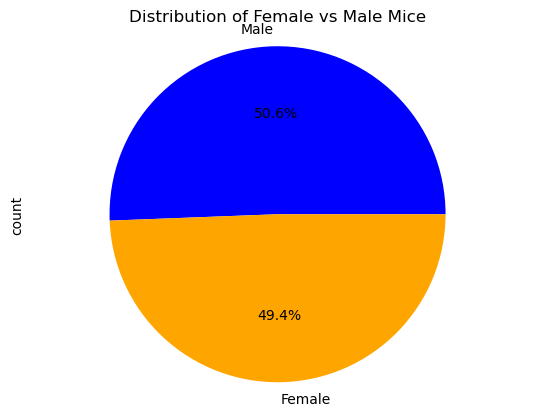

In [9]:
# Count the number of female and male mice
gender_distribution = combined_mouse_metadata_study_results['Sex'].value_counts()

# Plotting a pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])

# Adding a title
plt.title('Distribution of Female vs Male Mice')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

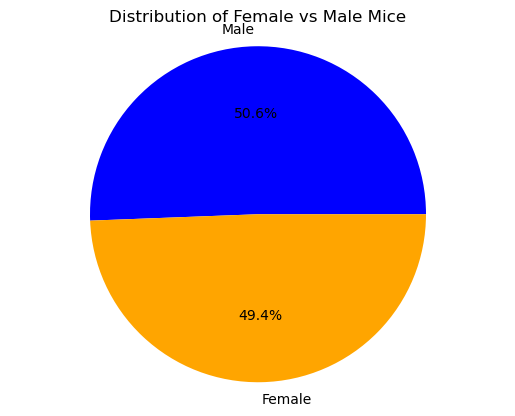

In [10]:
# Count the number of female and male mice
gender_distribution = combined_mouse_metadata_study_results['Sex'].value_counts()

# Plotting a pie chart using Matplotlib's pyplot methods
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])

# Adding a title
plt.title('Distribution of Female vs Male Mice')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [11]:
# Filter the DataFrame to include only the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = combined_mouse_metadata_study_results[combined_mouse_metadata_study_results['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, combined_mouse_metadata_study_results, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame showing the last timepoint for each mouse
print(last_timepoints)

# Display the merged DataFrame
print(merged_df)

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female   

In [12]:
# Step 1: Put treatments into a list for a loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Step 3: Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Step 4: Locate the rows containing mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Step 5: Add subset of tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results
    print(f"Results for {treatment}:")
    print(f"  Lower Quartile: {lower_quartile}")
    print(f"  Upper Quartile: {upper_quartile}")
    print(f"  Interquartile Range (IQR): {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers}\n")

Results for Capomulin:
  Lower Quartile: 32.37735684
  Upper Quartile: 40.1592203
  Interquartile Range (IQR): 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ramicane:
  Lower Quartile: 31.56046955
  Upper Quartile: 40.65900627
  Interquartile Range (IQR): 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Infubinol:
  Lower Quartile: 54.04860769
  Upper Quartile: 65.52574285
  Interquartile Range (IQR): 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Results for Ceftamin:
  Lower Quartile: 48.72207785
  Upper Quartile: 64.29983003
  Interquartile Range (IQR): 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.6664582999

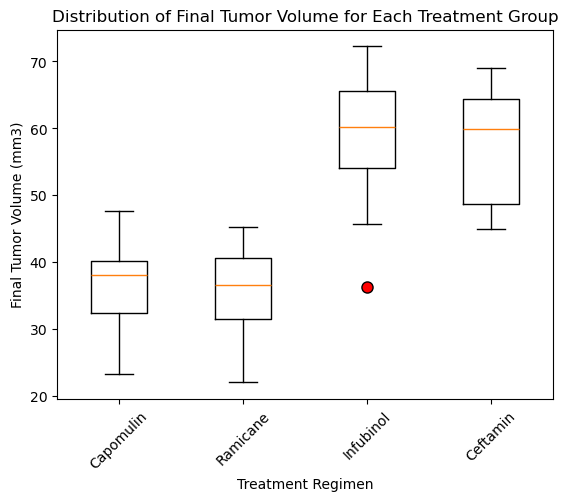

In [13]:
# Generate the box plot
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))

# Add labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')

# Show the plot
plt.xticks(rotation=45)
plt.show()

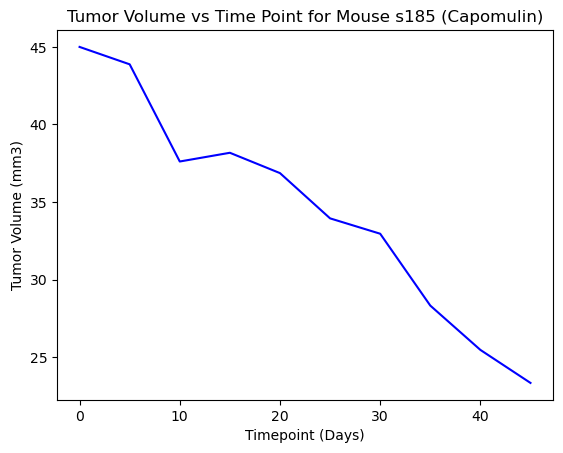

In [14]:
# Filter the DataFrame for mice treated with Capomulin
capomulin_df = combined_mouse_metadata_study_results[combined_mouse_metadata_study_results['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin (for example, the first mouse in the DataFrame)
mouse_id = capomulin_df['Mouse ID'].iloc[0]

# Filter the Capomulin DataFrame for the selected mouse
single_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Generate the line plot
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], color='blue', linestyle='-')

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs Time Point for Mouse {mouse_id} (Capomulin)')

# Show the plot
plt.show()

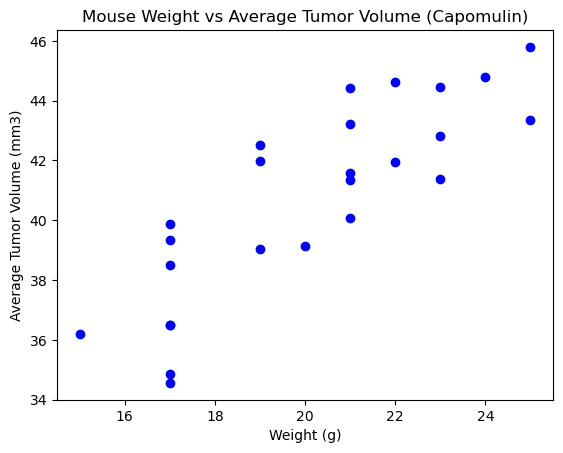

In [15]:
# Filter the DataFrame for mice treated with Capomulin
capomulin_df = combined_mouse_metadata_study_results[combined_mouse_metadata_study_results['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Obtain the weight of each mouse treated with Capomulin
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].unique()

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')

# Show the plot
plt.show()

In [16]:
# Filter the DataFrame for mice treated with Capomulin
capomulin_df = combined_mouse_metadata_study_results[combined_mouse_metadata_study_results['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Obtain the weight of each mouse treated with Capomulin
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

# Print the slope and intercept of the linear regression model
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Correlation Coefficient: 0.8419363424694722
Slope: 0.9544396890241049
Intercept: 21.552160532685008


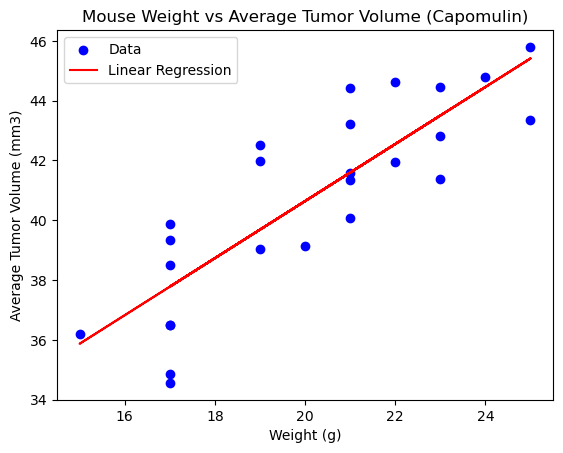

In [17]:
# Plot the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', label='Data')

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')

# Add legend
plt.legend()

# Show the plot
plt.show()